In [40]:
import numpy as np
import pandas as pd
import sklearn.model_selection as skm

from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots
from sklearn.cross_decomposition import PLSRegression

### (a)

In [41]:
np.random.seed(101)

Beta = np.random.rand(20)

Beta[17] = 0
Beta[13] = 0


# Generate a data set with p = 20 features, 1000 rows
X = pd.DataFrame(
    np.random.randn(1000, 20), columns=["X" + str(i) for i in range(1, 21)]
)
y = (
    Beta[0] *   X["X1"]
    + Beta[1] * X["X2"]
    + Beta[2] * X["X3"]
    + Beta[3] * X["X4"]
    + Beta[4] * X["X5"]
    + Beta[5] * X["X6"]
    + Beta[6] * X["X7"]
    + Beta[7] * X["X8"]
    + Beta[8] * X["X9"] 
    + Beta[9] * X["X10"]
    + Beta[10] * X["X11"]  
    + Beta[11] * X["X12"]
    + Beta[12] * X["X13"]
    + Beta[13] * X["X14"]
    + Beta[14] * X["X15"]
    + Beta[15] * X["X16"] 
    + Beta[16] * X["X17"]
    + Beta[17] * X["X18"]
    + Beta[18] * X["X19"]
    + Beta[19] * X["X20"]    
    + np.random.random()
)

X


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,0.190794,1.978757,2.605967,0.683509,0.302665,1.693723,-1.706086,-1.159119,-0.134841,0.390528,0.166905,0.184502,0.807706,0.072960,0.638787,0.329646,-0.497104,-0.754070,-0.943406,0.484752
1,-0.116773,1.901755,0.238127,1.996652,-0.993263,0.196800,-1.136645,0.000366,1.025984,-0.156598,-0.031579,0.649826,2.154846,-0.610259,-0.755325,-0.346419,0.147027,-0.479448,0.558769,1.024810
2,-0.925874,1.862864,-1.133817,0.610478,0.386030,2.084019,-0.376519,0.230336,0.681209,1.035125,-0.031160,1.939932,-1.005187,-0.741790,0.187125,-0.732845,-1.382920,1.482495,0.961458,-2.141212
3,0.992573,1.192241,-1.046780,1.292765,-1.467514,-0.494095,-0.162535,0.485809,0.392489,0.221491,-0.855196,1.541990,0.666319,-0.538235,-0.568581,1.407338,0.641806,-0.905100,-0.391157,1.028293
4,-1.972605,-0.866885,0.720788,-1.223082,1.606780,-1.115710,-1.385379,-1.329660,0.041460,-0.411055,-0.771329,0.110477,-0.804652,0.253548,0.649148,0.358941,-1.080471,0.902398,0.161781,0.833029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.516255,-1.724633,-1.542213,-0.088091,-1.040291,-1.033232,-1.298721,-1.626014,-0.396586,-1.039386,-0.414707,1.282819,0.882286,-1.170094,-1.568459,0.441951,0.611973,0.456404,-1.172725,-0.754067
996,-2.405842,-0.525557,1.628092,-2.121631,-2.765244,0.249249,0.492900,-0.860231,-0.472379,0.750471,-0.752614,0.366608,0.402962,-2.402726,-0.119417,1.629144,-1.202994,-0.399226,-0.689844,2.117731
997,0.335692,-0.636794,-0.589746,1.012913,1.408793,-1.807367,3.003952,0.238326,1.447439,1.440887,1.325481,-0.212879,0.077133,0.314211,0.670221,0.667715,0.133322,0.201482,0.926892,1.164117
998,-0.311782,-0.698424,-0.515086,1.703160,-0.275223,0.191779,0.559688,-0.006021,0.478145,0.009182,-1.282077,0.212471,1.480033,-0.102322,-0.012040,-1.195770,-0.299158,-0.740550,1.294379,0.123576


### (b)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=900, random_state=42)
X_train.shape

(100, 20)

### (c)

In [43]:
pls = PLSRegression(n_components=2, scale=True)
pls.fit(X_train, y_train)

K = 5

kfold = skm.KFold(n_splits=K, shuffle=True, random_state=1)
param_grid = {"n_components": range(1, 21)}
grid = skm.GridSearchCV(pls, param_grid, cv=kfold, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 21)},
             scoring='neg_mean_squared_error')

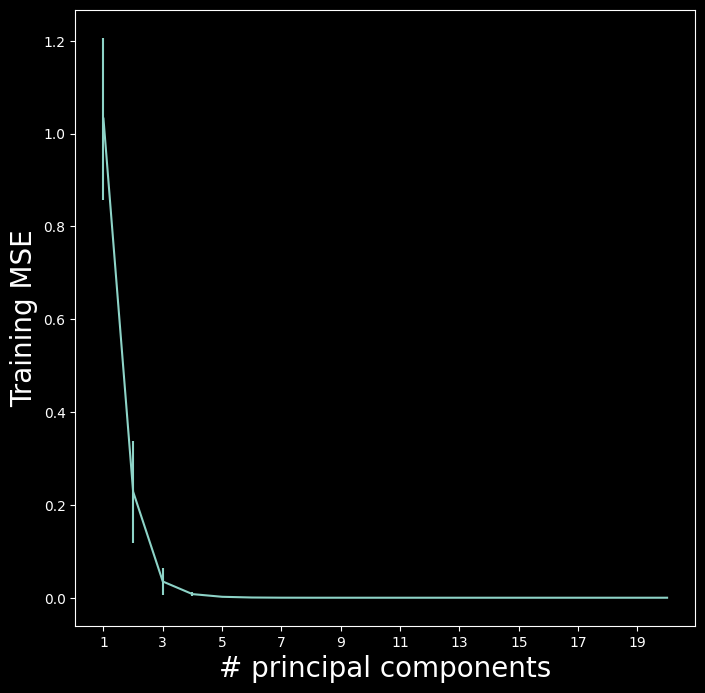

In [44]:
fig, ax = subplots(figsize=(8, 8))

n_comp = param_grid['n_components']
ax.errorbar(n_comp,-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'])
ax.set_ylabel('Training MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]);

### (d)

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

test_mse = []
models = []
col_names_r = []

for i in range(1, 21):
    select = SelectKBest(score_func=f_regression, k=i)    
    select.fit_transform(X_train, y_train)        
    filter = select.get_support()    
    
    # names of the best i features
    col_names = X_train.columns[filter]        
    X_train_short = X_train[col_names]
    X_test_short = X_test[col_names]

    reg = LinearRegression()
    model = reg.fit(X_train_short, y_train)        


    # get test MSE
    y_pred_test = model.predict(X_test_short)        
    test_mse.append(np.mean((y_test - y_pred_test) ** 2))
    
    # remember model for later use
    models.append(model)

    # remember columns for later use
    col_names_r.append(col_names)
    


Text(0, 0.5, 'MSE')

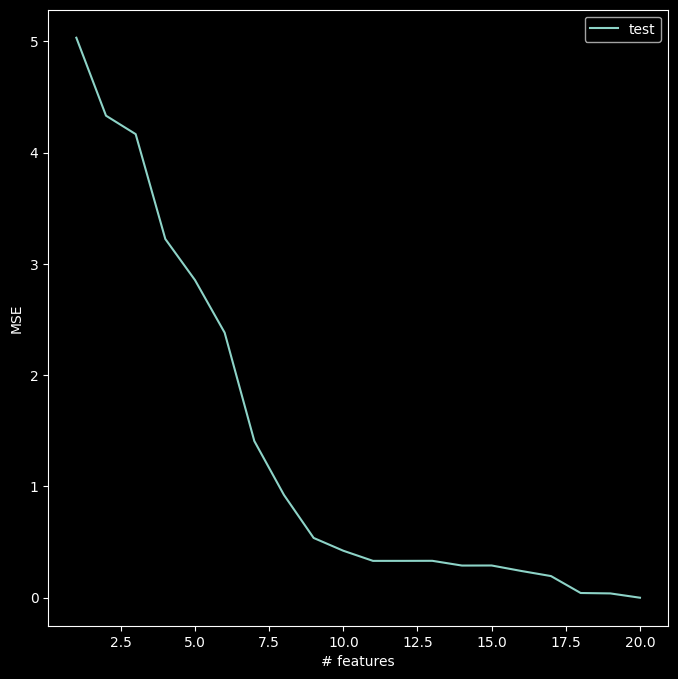

In [46]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(range(1, 21), test_mse, label="test")
ax.legend()
ax.set_xlabel("# features")
ax.set_ylabel("MSE")



### (e)

Giving up - got lowest MSE for all features

### (f)

In [47]:
models[-1].coef_, models[-1].intercept_

(array([ 5.16398628e-01,  5.70667587e-01,  2.84742265e-02,  1.71521656e-01,
         6.85276982e-01,  8.33896863e-01,  3.06966220e-01,  8.93613080e-01,
         7.21543862e-01,  1.89938954e-01,  5.54227591e-01,  3.52131954e-01,
         1.81892403e-01, -1.19348975e-15,  9.65483222e-01,  2.32353662e-01,
         8.35614337e-02, -3.30985239e-15,  7.28992757e-01,  2.76238828e-01]),
 0.011789387955152691)

### (g)

In [48]:
#
g_results = []

for (i, model) in enumerate(models):        
    Beta_r = pd.Series(np.zeros(20))
    # add index X1 TO X20
    Beta_r.index = ["X" + str(i) for i in range(1, 21)]
    # update Beta_r at indexes positions with coefficents
    Beta_r.loc[col_names_r[i]] = model.coef_        
    # print(col_names_r[i])
    # print(model.coef_)
    # print(Beta_r)    
    # print("---------------------------")    
    result = np.sqrt(np.sum((Beta - Beta_r)**2))
    g_results.append(result)


Text(0, 0.5, 'diff')

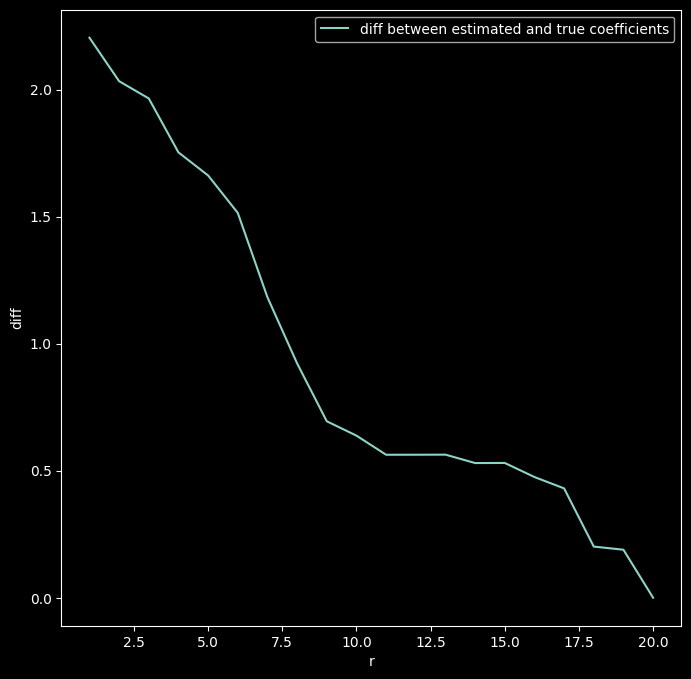

In [51]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(range(1, 21), g_results, label="diff between estimated and true coefficients")
ax.legend()
ax.set_xlabel("r")
ax.set_ylabel("diff")

The model with 20 predictors is the closest one to the true Beta. This plot complies with (d)